# Stocks Time Series Analysis and Forecasting

In [1]:
import os
os.chdir('D:/source/repos')
os.getcwd()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime as dt
import seaborn as sb; sb.set()
import yahoo_fin.stock_info as si
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.tsa.statespace.sarimax as sms
from Trading.JLUtilities.StockFcst import *
from Trading.JLUtilities.TsStats import *

%run ds_topics/28_time_series_forecasting/basic_methods.ipynb
%run ProblemSolving/Visual/TimeSeries/TsPlots.py

### Load data

In [2]:
df_sp500_180 = pd.read_csv('D:/Invest/data/stock_hist/sp500_180.csv')
#df_sp500_180

sp500_candidates = pd.read_excel(('D:/Invest/data/stock_hist/sp500_candidates.xlsx'))
#sp500_candidates['ticker'].values

dict_candidates = { i : 0 for i in sp500_candidates['ticker'].values }
#dict_candidates

### MA Crosses

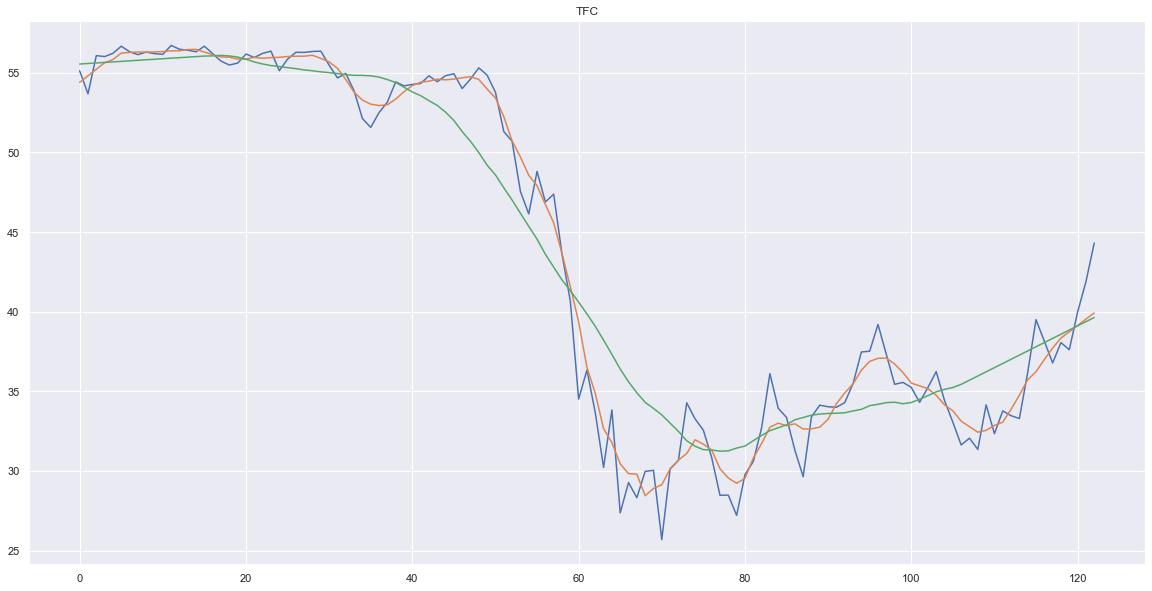

In [15]:
PlotStockMA(df_sp500_180, 'TFC', 6, 30)

In [ ]:
for i in range(1, df_sp500_180.shape[1]):
    ticker = df_sp500_180.columns[i]
    if ticker in dict_candidates:
        PlotStockMA(df_sp500_180, ticker, 6, 30)

### Winners/Loosers in a period

In [25]:
nTop = 10

res = pd.DataFrame(columns=['ticker', 'diff'])
for i in range(1, df_sp500_180.shape[1]):
    ticker = df_sp500_180.columns[i]
    try:
        diff = GetMADiff(df_sp500_180, ticker, 6, 4)
        res = res.append({ 'ticker' : ticker, 'diff': diff}, ignore_index=True)
    except:
        print('Error : ', ticker)
res.sort_values(by=['diff'], ascending=False,  inplace=True)
res

Error :  BFB


,ticker,diff
19,AAL,28.03
456,UAL,18.62
240,HP,17.16
142,DAL,15.32
75,BA,15.07
...,...,...
293,LEN,-4.23
458,UHS,-4.73
148,DHI,-6.23
441,TIF,-7.00


#### Winners

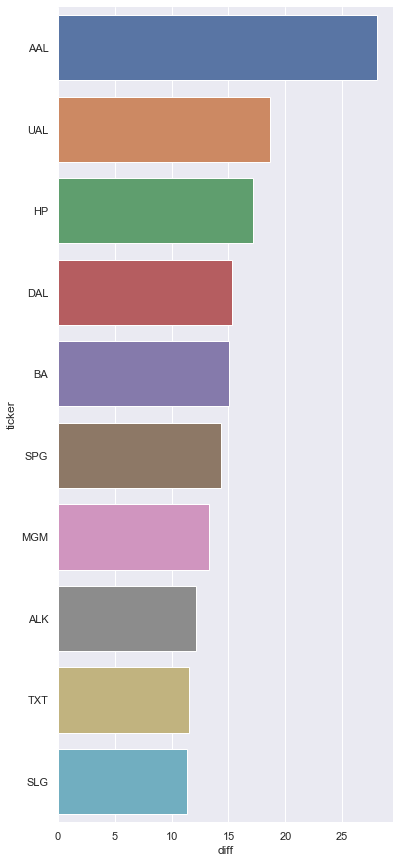

In [26]:
f, ax = plt.subplots(figsize=(6, 15))
sb.barplot(x="diff", y="ticker", data=res.head(nTop))
sb.despine(left=True, bottom=True)

#### Loosers

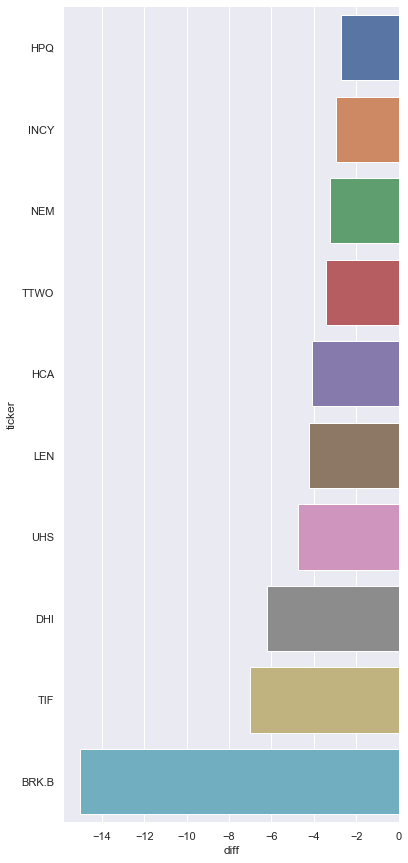

In [27]:
f, ax = plt.subplots(figsize=(6, 15))
sb.barplot(x="diff", y="ticker", data=res.tail(nTop))
sb.despine(left=True, bottom=True)

In [4]:
nTop = 10
start = '2020-01-20'
end = '2020-06-26'
res = pd.DataFrame(columns=['ticker', 'maxLoss', 'currLoss'])
for i in range(1, df_sp500_180.shape[1]):
    ticker = df_sp500_180.columns[i]
    try:
        ts = df_sp500_180[ticker] 
        maxLoss = GetMaxLoss(ts)
        currLoss = GetCurrLoss(ts)
        res = res.append({ 'ticker' : ticker, 'maxLoss': maxLoss, 'currLoss': currLoss}, ignore_index=True)
    except:
        print('Error : ', ticker)
res.sort_values(by=['maxLoss'], ascending=False,  inplace=True)
res

,ticker,maxLoss,currLoss
503,BRK.B,95.7,53.4
62,APA,88.0,52.2
341,NBL,87.8,54.7
342,NCLH,87.0,62.4
99,CCL,84.6,58.6
...,...,...,...
1,OTIS,NaN,NaN
2,CARR,NaN,NaN
3,HWM,NaN,NaN
4,TT,NaN,NaN


In [3]:
ts = df_sp500_180['AMZN']
maxLoss = GetMaxLoss(ts)
currLoss = GetCurrLoss(ts)
currLoss

0.6